In [1]:
from os.path import join as j
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

In [2]:
with open("../data_dirs.txt", "r") as f: # your dataset folder should  be in a text file here
    DATA_DIRS = f.readlines()
    DATA_DIRS = [p.strip() for p in DATA_DIRS]

In [3]:
EMB_PROPERTY = ["undirected"]*3 + ["title"]*3 + ["abstract"]*3
EMB_METHOD = ["leigenmap", "node2vec", "residual2vec", "doc2vec", "scibert", "sentencebert", "doc2vec", "scibert", "sentencebert"]
EMB_METHOD_ST = ["Laplacian Eigenmap", "node2vec", "residual2vec", "doc2vec (title)", "SciBERT (title)", "Sentence-BERT (title)", "doc2vec (abstract)", "SciBERT (abstract)", "Sentence-BERT (abstract)"]
COLORS = ["teal", "steelblue", "blue", "orchid", "coral", "orange", "darkorchid", "tab:red", "darkorange"]

In [4]:
# For prettification of figure
prop_stylized = {
    "undirected": "Undirected Graph",
    "tocited": "Directed (to reference) Graph",
    "tociting": "Directed (to citing paper) Graph",
    "title": "Title",
    "abstract": "Abstract",
    "titleabstract": "Title+Abstract",
    "fulltext": "Full Text",
}
emb_stylized = {
    "leigenmap": "Laplacian Eigenmap",
    "node2vec": "node2vec",
    "residual2vec": "residual2vec",
    "doc2vec": "doc2vec",
    "scibert": "SciBERT",
    "sentencebert": "Sentence-BERT",
}

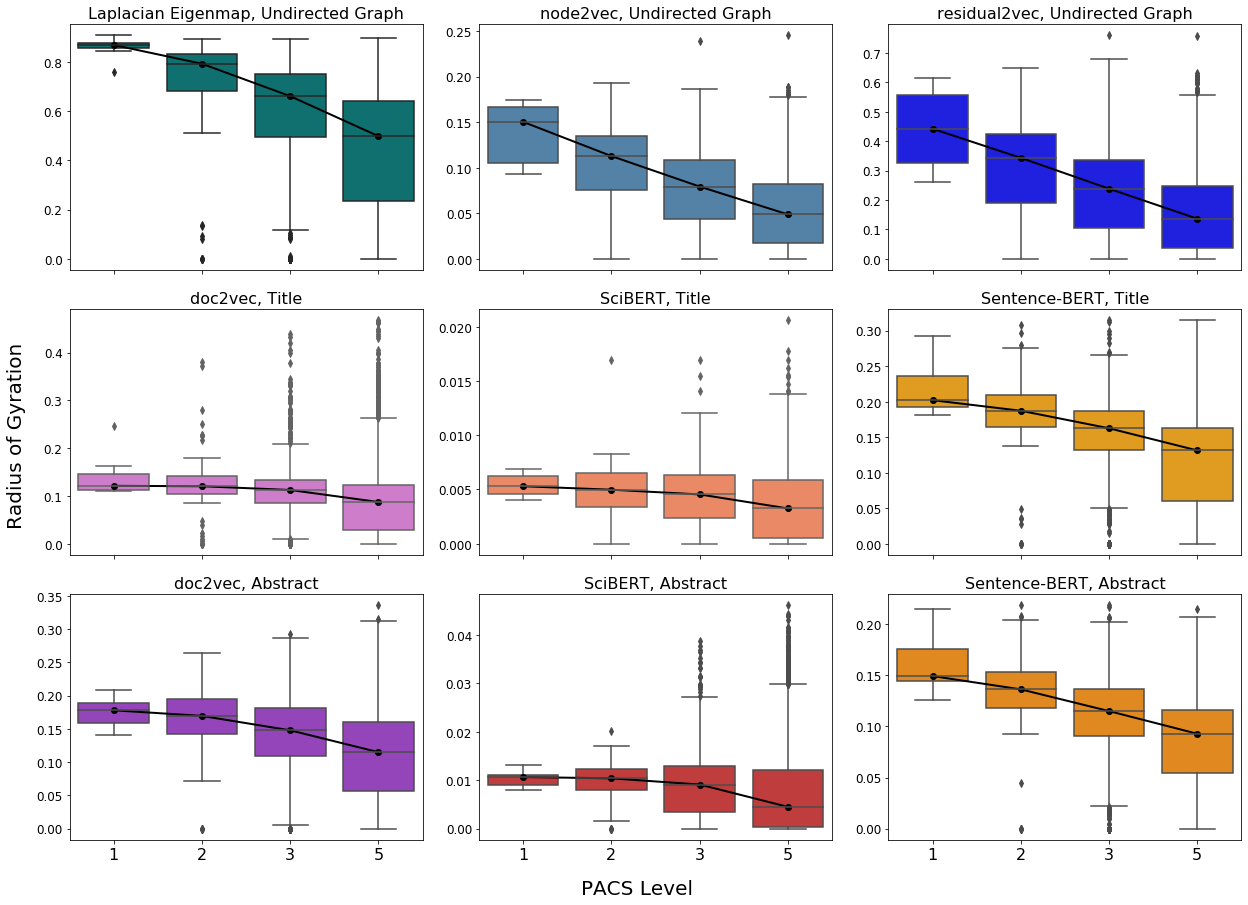

In [13]:
fig = plt.figure(figsize=(21,15))
fig.text(0.5, 0.08, 'PACS Level', ha='center', va='center', fontsize=20)
fig.text(0.09, 0.5, 'Radius of Gyration', ha='center', va='center', rotation='vertical', fontsize=20)
for i in range(0, len(EMB_METHOD)):
    PROPERTY = EMB_PROPERTY[i]
    EMBEDDING_METHOD = EMB_METHOD[i]
    
    try:
        st_prop = prop_stylized[PROPERTY]
    except KeyError:
        st_prop = PROPERTY
    try:
        st_emb = emb_stylized[EMBEDDING_METHOD]
    except KeyError:
        st_emb = EMBEDDING_METHOD
    
    ax = fig.add_subplot(3,3,i+1)
    
    # Plot ROG
    ROG_PATH = j(DATA_DIRS[0], "derived", "rog", "aps_all_2010_{}_{}_rog.csv".format(PROPERTY, EMBEDDING_METHOD))
    rogs = pd.read_csv(ROG_PATH, header=0)
    g = sns.boxplot(x="PACS_LEVEL", y="ROG", data=rogs, color=COLORS[i], ax=ax)
    if i < 6:
        g.set(xticklabels=[])
    
    # Plot medians
    medians = rogs.groupby("PACS_LEVEL").ROG.median()
    ax.plot(range(len(medians)), medians.values, color="black", linewidth=2, marker="o") 
    
    # Prettify
    ax.set_title("{}, {}".format(st_emb, st_prop))  #("{} {} Embedding Cosine Distance".format(st_prop, st_emb))
    ax.set(xlabel=None, ylabel=None)
    ax.title.set_size(16)
    ax.tick_params(axis='y', which='major', labelsize=12)
    ax.tick_params(axis='x', which='major', labelsize=16)
        
plt.subplots_adjust(wspace=0.16, hspace=0.16)

plt.savefig(
    "aps_all_2010_rog_withmedian.pdf",
    bbox_inches="tight",
)